# Esport - CS2 demo analysis

This jupyter notebook can be found here https://drive.google.com/file/d/11yr8qwfT3YO204pEjOpYRfRXDcGdGQQV/view?usp=sharing

- Demo file: https://drive.google.com/file/d/1AVZ3IdrN-TCkclVUcSEyjwrYMH58aqWe/view?usp=sharing
- Map: https://drive.google.com/file/d/1jQZULatBDxeBHUeQfj9XUgFDbwjwvKhm/view?usp=sharing

Project requirements:
<br>numpy
<br>pandas
<br>matplotlib
<br>demoparser2
<br>jupyterlab
<br>seaborn

Useful links:
- HLTV results - https://www.hltv.org/results
- CS2 events - https://cs2.poggu.me/dumped-data/game-events/
- CS2 map sizes - https://github.com/pnxenopoulos/awpy/blob/main/awpy/data/map_data.py

CS2 Parser:
- Parser - https://github.com/LaihoE/demoparser
- Documentation - https://github.com/LaihoE/demoparser/tree/main/documentation/python
- Example - https://github.com/LaihoE/demoparser/blob/main/examples/1vX/main.py
- Examples - https://github.com/LaihoE/demoparser/tree/main/examples

## Imports

In [2]:
from demoparser2 import DemoParser
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns

## Functions

In [3]:
def draw_map(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['X'], df['Y'], c='blue', marker='o', label='Player Positions')
    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('2D Map of Player Positions')
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
def draw_movement(df_all, df_path=None, title='2D Map of Player Positions', labels='Player Positions'):
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6))

    img = mpimg.imread('Cs2_mirage_radar.webp')
    # Plot the image behind the points
    plt.imshow(img, extent=[-3230, 1883, -3490, 1713], aspect='auto')  # Extent sets the image limits

    plt.scatter(df_all['X'], df_all['Y'], c='blue', marker='o', label=labels)

    if df_path is not None:
        plt.scatter(df_path['X'], df_path['Y'], color='red', linewidth=2, label='Highlighted path', marker='o')

    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)

    # Adding labels and title
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(title)

    # Display the plot
    plt.grid(True)
    plt.legend()
    plt.show()

# Data overview

In [5]:
parser = DemoParser("demos/eternal-fire-vs-natus-vincere-m2-mirage.dem")

## Events

In [6]:
df_deaths = parser.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])
df_weapon_fires = parser.parse_event("weapon_fire", player=["X", "Y"], other=["total_rounds_played"])
df_player_spawns = parser.parse_event("player_spawn", other=["total_rounds_played"])
df_player_teams = parser.parse_event("player_team", other=["total_rounds_played"])
df_player_hurts = parser.parse_event("player_hurt", other=["total_rounds_played"])
df_round_starts = parser.parse_event("round_start")
df_round_ends = parser.parse_event("round_end")
df_last_round_half = parser.parse_event("round_announce_last_round_half")
df_item_purchases = parser.parse_event("item_purchase", other=["total_rounds_played"])
df_item_pickups = parser.parse_event("item_pickup", other=["total_rounds_played"])
df_bomb_plants = parser.parse_event("bomb_planted", other=["total_rounds_played"])
df_bomb_defuses = parser.parse_event("bomb_defused", other=["total_rounds_played"])
df_bomb_explosions = parser.parse_event("bomb_exploded", other=["total_rounds_played"])
df_bomb_drops = parser.parse_event("bomb_dropped", other=["total_rounds_played"])
df_bomb_pickups = parser.parse_event("bomb_pickup", other=["total_rounds_played"])
df_hegrenade_detonations = parser.parse_event("hegrenade_detonate", other=["total_rounds_played"])
df_flashbang_detonations = parser.parse_event("flashbang_detonate", other=["total_rounds_played"])
df_smokegrenade_detonations = parser.parse_event("smokegrenade_detonate", other=["total_rounds_played"])
df_smokegrenade_expirations = parser.parse_event("smokegrenade_expired", other=["total_rounds_played"])
df_inferno_startburns = parser.parse_event("inferno_startburn", other=["total_rounds_played"])
df_inferno_expirations = parser.parse_event("inferno_expire", other=["total_rounds_played"])
df_player_pings = parser.parse_event("player_ping", other=["total_rounds_played"])
df_player_sounds = parser.parse_event("player_sound", other=["total_rounds_played"])
df_ticks = parser.parse_ticks(["X", "Y"])
df_player_blind = parser.parse_event("player_blind")

In [6]:
max_round = df_player_spawns["total_rounds_played"].max() + 1
max_round

np.int32(18)

Team interpretation in numbers:
- 3 = CT
- 2 = T

In [7]:
df_player_teams

,disconnect,isbot,oldteam,silent,team,tick,total_rounds_played,user_name,user_steamid
0,False,False,2,True,3,87273,12,jL,76561198176878303
1,False,False,3,True,2,87273,12,Calyx,76561198052546265
2,False,False,2,True,3,87273,12,w0nderful,76561199063068840
3,False,False,3,True,2,87273,12,Wicadia,76561198812513923
4,False,False,3,True,2,87273,12,MAJ3R,76561197967432889
5,False,False,2,True,3,87273,12,Aleksib,76561198013243326
6,False,False,3,True,2,87273,12,XANTARES,76561198044118796
7,False,False,2,True,3,87273,12,b1t,76561198246607476
8,False,False,2,True,3,87273,12,iM,76561198050250233
9,False,False,3,True,2,87273,12,woxic,76561198083485506


In [8]:
# Another approach
df_team_info2 = parser.parse_player_info();
df_team_info2

,steamid,name,team_number
0,76561198176878303,jL,3
1,76561198052546265,Calyx,2
2,76561199063068840,w0nderful,3
3,76561198812513923,Wicadia,2
4,76561197967432889,MAJ3R,2
5,76561198013243326,Aleksib,3
6,76561198044118796,XANTARES,2
7,76561198246607476,b1t,3
8,76561198050250233,iM,3
9,76561198083485506,woxic,2


In [9]:
df_deaths

,assistedflash,assister_X,assister_Y,assister_name,assister_steamid,attacker_X,attacker_Y,attacker_name,attacker_steamid,attackerblind,...,total_rounds_played,user_X,user_Y,user_name,user_steamid,weapon,weapon_fauxitemid,weapon_itemid,weapon_originalowner_xuid,wipe
0,False,NaN,NaN,None,None,296.651398,-1586.485962,Aleksib,76561198013243326,False,...,0,150.391434,-1526.738159,Wicadia,76561198812513923,glock,17293822569165815812,20660576547,,0
1,False,NaN,NaN,None,None,-452.761658,-1758.071045,Aleksib,76561198013243326,False,...,0,-531.607178,-2378.742432,XANTARES,76561198044118796,glock,17293822569165815812,20660576547,,0
2,False,-531.607178,-2378.742432,XANTARES,76561198044118796,-1570.978027,-760.632751,MAJ3R,76561197967432889,False,...,0,-1272.865112,-1050.418091,iM,76561198050250233,usp_silencer,17293822569145761853,13626608964,,0
3,False,NaN,NaN,None,None,-812.001831,-2082.587646,w0nderful,76561199063068840,False,...,0,-465.970337,-2350.779785,Calyx,76561198052546265,glock,17293822569105195012,34398553971,,0
4,False,NaN,NaN,None,None,NaN,NaN,None,None,False,...,0,-1693.296631,-1375.607422,Aleksib,76561198013243326,planted_c4,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,NaN,NaN,None,None,-1698.991211,682.782166,jL,76561198176878303,False,...,17,-1064.924072,151.871338,XANTARES,76561198044118796,m4a1_silencer,17293822569131868220,34241486015,,0
121,False,-2065.616211,-559.346924,iM,76561198050250233,-1699.885620,681.705627,jL,76561198176878303,False,...,17,-1210.908081,285.837585,MAJ3R,76561197967432889,m4a1_silencer,17293822569131868220,34241486015,,0
122,False,-1064.924072,151.871338,XANTARES,76561198044118796,-1022.358459,120.646042,woxic,76561198083485506,False,...,17,-1699.831299,683.073303,jL,76561198176878303,ak47,17293822569170534407,25065970543,,0
123,False,-1699.792603,683.121765,jL,76561198176878303,-2495.580322,328.931458,Aleksib,76561198013243326,False,...,17,-1021.273499,123.897125,woxic,76561198083485506,deagle,17293822569105129473,29398974889,,0


In [10]:
df_deaths.keys()

Index(['assistedflash', 'assister_X', 'assister_Y', 'assister_name',
       'assister_steamid', 'attacker_X', 'attacker_Y', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'attackerinair', 'distance',
       'dmg_armor', 'dmg_health', 'dominated', 'headshot', 'hitgroup',
       'noreplay', 'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick',
       'total_rounds_played', 'user_X', 'user_Y', 'user_name', 'user_steamid',
       'weapon', 'weapon_fauxitemid', 'weapon_itemid',
       'weapon_originalowner_xuid', 'wipe'],
      dtype='object')

In [11]:
df_player_hurts['dmg_health'] = df_player_hurts['dmg_health'].clip(upper=100)
df_total_dmg = df_player_hurts.groupby('user_name')['dmg_health'].sum().reset_index()
df_total_dmg



,user_name,dmg_health
0,Aleksib,1316
1,Calyx,1964
2,MAJ3R,2060
3,Wicadia,2011
4,XANTARES,1705
5,b1t,1581
6,iM,1923
7,jL,1378
8,w0nderful,1122
9,woxic,1767


## Movements

In [12]:
df_movements = parser.parse_ticks(["X", "Y", "team_rounds_total", "team_name", "is_alive", "total_rounds_played"])
df_movements

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,TERRORIST,1136.047729,-160.015564,True,1,76561198176878303,jL
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
2,0,0,TERRORIST,1216.000000,-307.000000,True,1,76561199063068840,w0nderful
3,0,0,CT,-1656.000000,-1976.000000,True,1,76561198812513923,Wicadia
4,0,0,CT,-1776.000000,-1976.000000,True,1,76561197967432889,MAJ3R
...,...,...,...,...,...,...,...,...,...
1405715,18,13,CT,-2216.906006,621.395386,False,140592,76561198013243326,Aleksib
1405716,18,5,TERRORIST,-1064.924072,151.871338,False,140592,76561198044118796,XANTARES
1405717,18,13,CT,-701.487671,-1357.026489,False,140592,76561198246607476,b1t
1405718,18,13,CT,-1807.516724,-54.575256,True,140592,76561198050250233,iM


Rename "TERRORIST" into "T" to match the naming.

In [13]:
df_movements.loc[:, "team_name"] = df_movements["team_name"].replace("TERRORIST", "T")
df_movements

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,T,1136.047729,-160.015564,True,1,76561198176878303,jL
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
2,0,0,T,1216.000000,-307.000000,True,1,76561199063068840,w0nderful
3,0,0,CT,-1656.000000,-1976.000000,True,1,76561198812513923,Wicadia
4,0,0,CT,-1776.000000,-1976.000000,True,1,76561197967432889,MAJ3R
...,...,...,...,...,...,...,...,...,...
1405715,18,13,CT,-2216.906006,621.395386,False,140592,76561198013243326,Aleksib
1405716,18,5,T,-1064.924072,151.871338,False,140592,76561198044118796,XANTARES
1405717,18,13,CT,-701.487671,-1357.026489,False,140592,76561198246607476,b1t
1405718,18,13,CT,-1807.516724,-54.575256,True,140592,76561198050250233,iM


<Figure size 1000x600 with 0 Axes>

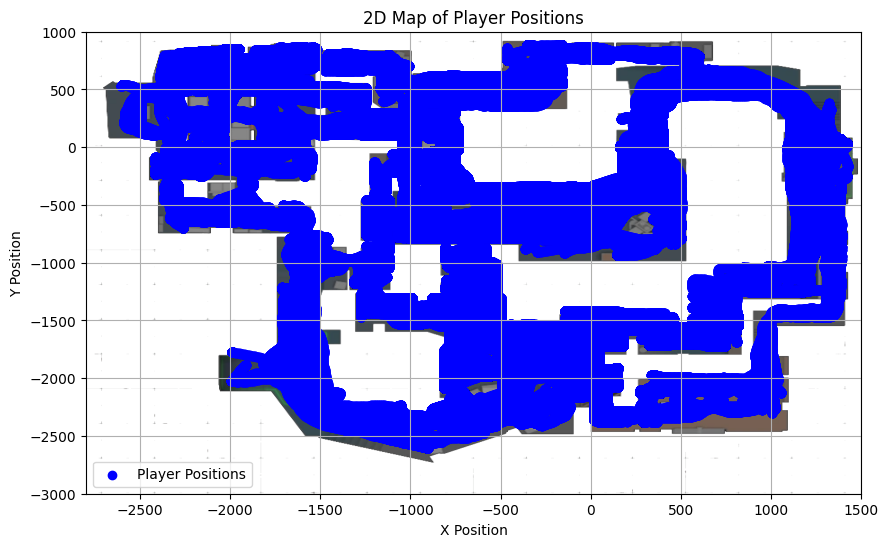

In [14]:
draw_movement(df_movements)

### Player "Calyx" movements

All selected movements for a specific player with name Calyx.

In [15]:
df_calyx_movement = df_movements[(df_movements["name"] == "Calyx")]
df_calyx_movement

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
11,0,0,CT,-1656.000000,-1800.000000,True,2,76561198052546265,Calyx
21,0,0,CT,-1656.000000,-1800.000000,True,3,76561198052546265,Calyx
31,0,0,CT,-1656.000000,-1800.000000,True,4,76561198052546265,Calyx
41,0,0,CT,-1656.000000,-1800.000000,True,5,76561198052546265,Calyx
...,...,...,...,...,...,...,...,...,...
1405671,18,5,T,-1736.228027,849.113464,False,140588,76561198052546265,Calyx
1405681,18,5,T,-1736.228027,849.113464,False,140589,76561198052546265,Calyx
1405691,18,5,T,-1736.228027,849.113464,False,140590,76561198052546265,Calyx
1405701,18,5,T,-1736.228027,849.113464,False,140591,76561198052546265,Calyx


Selected movements for the first round only.

In [16]:
df_calyx_movement_round1 = df_calyx_movement[(df_calyx_movement["total_rounds_played"]) == 0]
df_calyx_movement_round1

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
11,0,0,CT,-1656.000000,-1800.000000,True,2,76561198052546265,Calyx
21,0,0,CT,-1656.000000,-1800.000000,True,3,76561198052546265,Calyx
31,0,0,CT,-1656.000000,-1800.000000,True,4,76561198052546265,Calyx
41,0,0,CT,-1656.000000,-1800.000000,True,5,76561198052546265,Calyx
...,...,...,...,...,...,...,...,...,...
58601,0,0,CT,-465.557495,-2350.714355,False,5861,76561198052546265,Calyx
58611,0,0,CT,-465.557495,-2350.714355,False,5862,76561198052546265,Calyx
58621,0,0,CT,-465.557495,-2350.714355,False,5863,76561198052546265,Calyx
58631,0,0,CT,-465.557495,-2350.714355,False,5864,76561198052546265,Calyx


#### First round movement

<Figure size 1000x600 with 0 Axes>

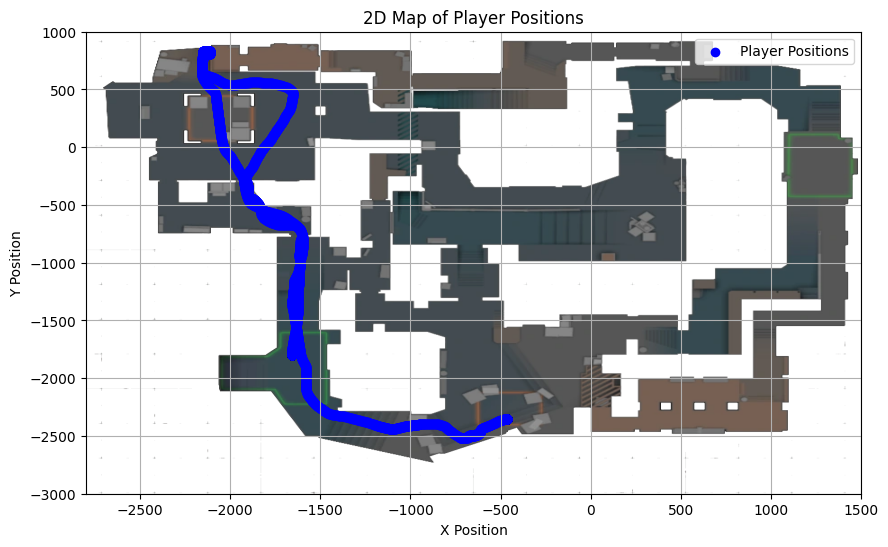

In [17]:
draw_movement(df_calyx_movement_round1)

Filter all movement for comparison to make calculation faster.

In [18]:
df_movements_filtered = df_movements[::5]
df_movements_filtered

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,T,1136.047729,-160.015564,True,1,76561198176878303,jL
5,0,0,T,1296.000000,32.000000,True,1,76561198013243326,Aleksib
10,0,0,T,1136.047729,-160.015564,True,2,76561198176878303,jL
15,0,0,T,1296.000000,32.000000,True,2,76561198013243326,Aleksib
20,0,0,T,1136.047729,-160.015564,True,3,76561198176878303,jL
...,...,...,...,...,...,...,...,...,...
1405695,18,13,CT,-2216.906006,621.395386,False,140590,76561198013243326,Aleksib
1405700,18,13,CT,-1699.792603,683.121765,False,140591,76561198176878303,jL
1405705,18,13,CT,-2216.906006,621.395386,False,140591,76561198013243326,Aleksib
1405710,18,13,CT,-1699.792603,683.121765,False,140592,76561198176878303,jL


In [19]:
print(f"df_movements:\t\t{df_movements.size}\ndf_movements_filtered:\t {df_movements_filtered.size}")

df_movements:		12651480
df_movements_filtered:	 2530296


<Figure size 1000x600 with 0 Axes>

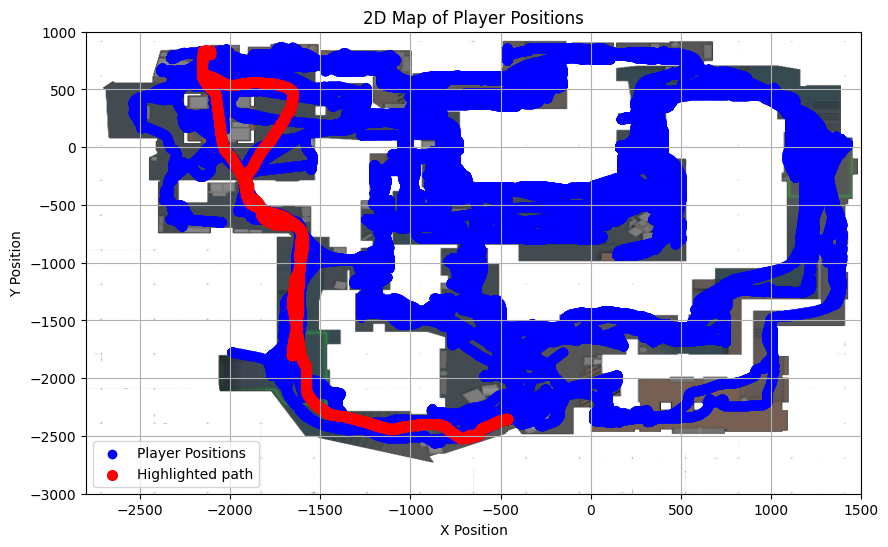

In [20]:
draw_movement(df_movements_filtered, df_calyx_movement_round1)

#### All movements as a CT

All movements for player named Calyx in the CT team.

<Figure size 1000x600 with 0 Axes>

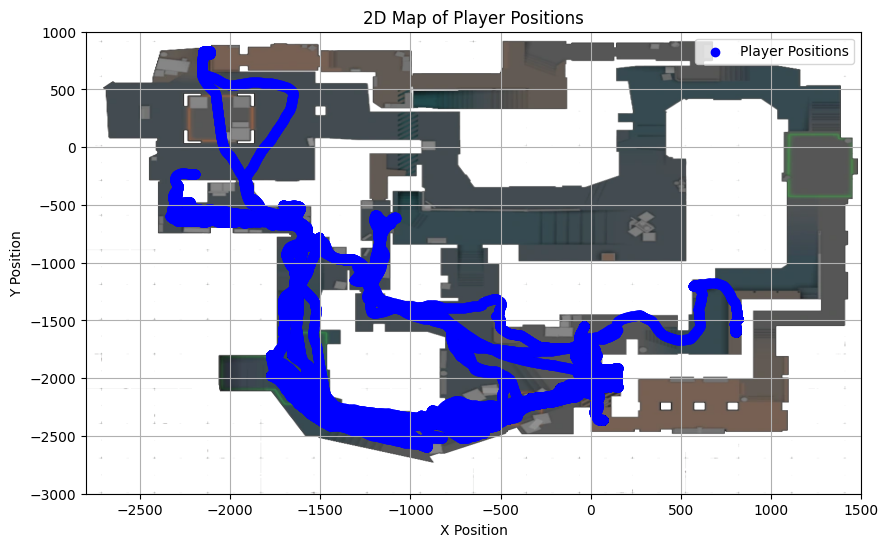

In [21]:
draw_movement(df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

Comparison of Calyx movements in the CT team with all movements.

<Figure size 1000x600 with 0 Axes>

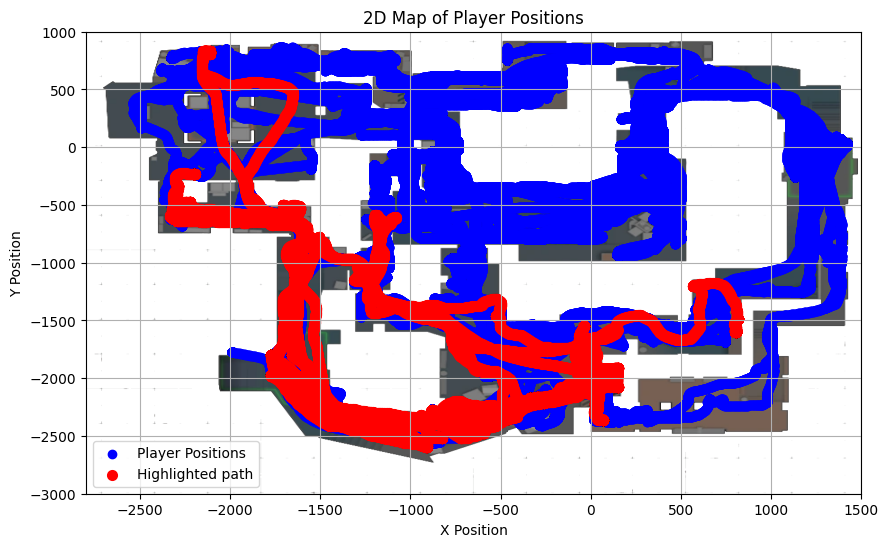

In [22]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

#### All movements as a T

All movements for player named Calyx in the T team.

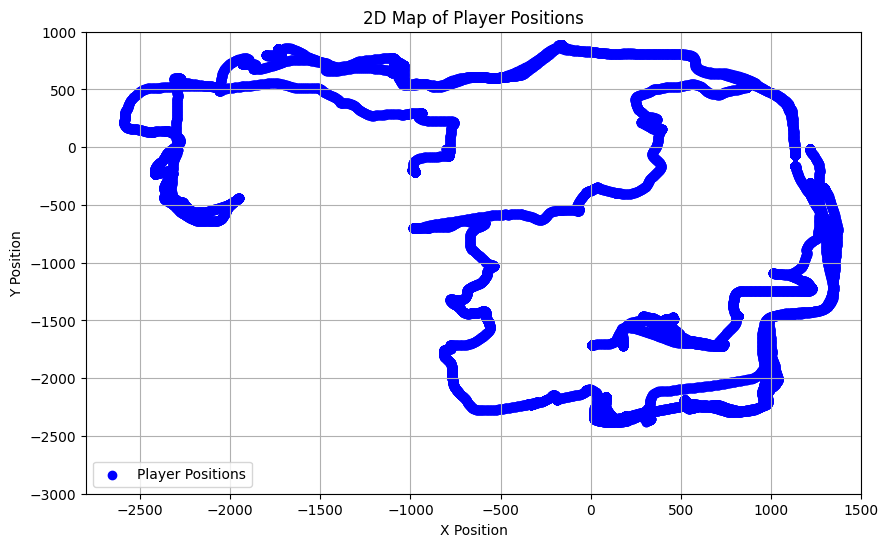

In [23]:
draw_map(df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

Comparison of Calyx movements in the T team with all movements.

<Figure size 1000x600 with 0 Axes>

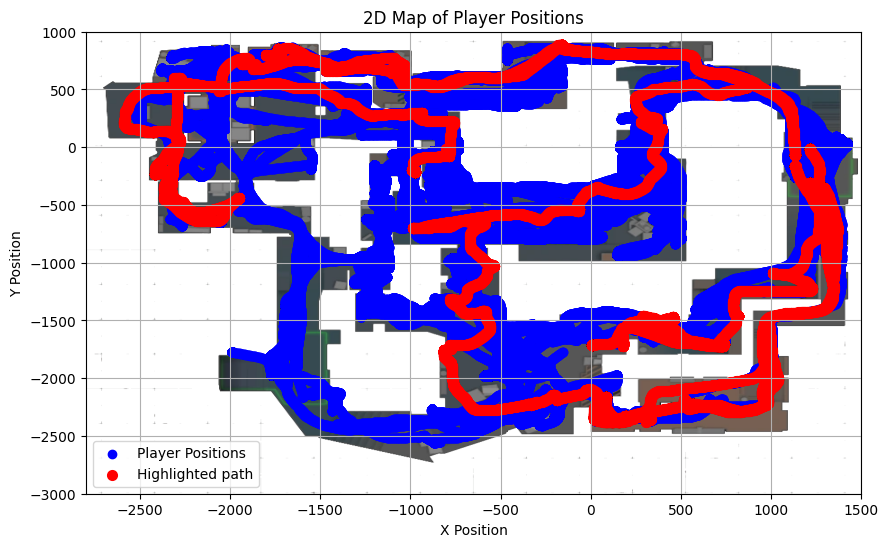

In [24]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

## Purchases

Data overview of purchase event table for all game rounds.

In [25]:
df_item_purchases

,cost,custom_name,float,inventory_slot,item_name,name,paint_seed,skin,skin_id,steamid,stickers,tick,total_rounds_played,was_sold
0,650,None,NaN,0,item_kevlar,Wicadia,NaN,None,NaN,76561198812513923,[],87,0,False
1,650,None,NaN,0,item_kevlar,woxic,NaN,None,NaN,76561198083485506,[],106,0,False
2,300,None,NaN,0,P250,jL,NaN,None,NaN,76561198176878303,[],137,0,True
3,300,None,NaN,1,Smoke Grenade,jL,NaN,None,NaN,76561198176878303,[],159,0,False
4,200,None,NaN,2,Flashbang,jL,NaN,None,NaN,76561198176878303,[],170,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,400,None,NaN,2,Molotov,woxic,NaN,None,NaN,76561198083485506,[],134774,17,False
752,200,None,NaN,3,Flashbang,woxic,NaN,None,NaN,76561198083485506,[],134774,17,False
753,200,None,NaN,3,Flashbang,Wicadia,NaN,None,NaN,76561198812513923,[],134915,17,False
754,300,None,NaN,4,Smoke Grenade,woxic,NaN,None,NaN,76561198083485506,[],135029,17,False


### All rounds purchases

Total number of purchases for each item.

In [26]:
item_name_counts_df = df_item_purchases.groupby('item_name').size().reset_index(name='count')
item_name_counts_df

,item_name,count
0,AK-47,33
1,AWP,9
2,Decoy Grenade,1
3,Desert Eagle,11
4,Dual Berettas,2
5,Five-SeveN,1
6,Flashbang,163
7,Galil AR,11
8,High Explosive Grenade,76
9,Incendiary Grenade,38


Plotting the chart of purchases for each weapon using pure matplotlib.

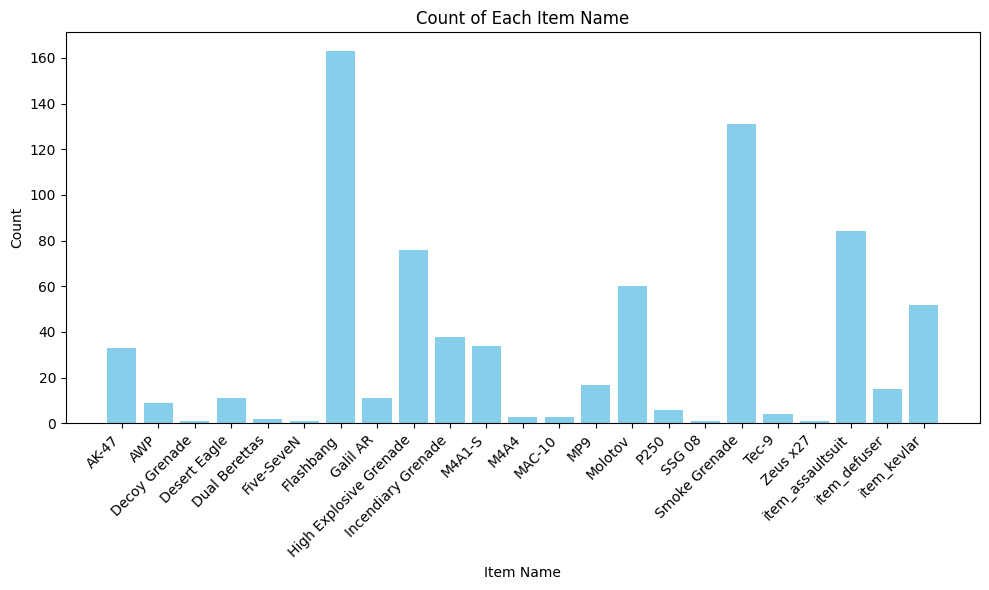

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(item_name_counts_df['item_name'], item_name_counts_df['count'], color='skyblue')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Using seaborn package to plot the chart instead.

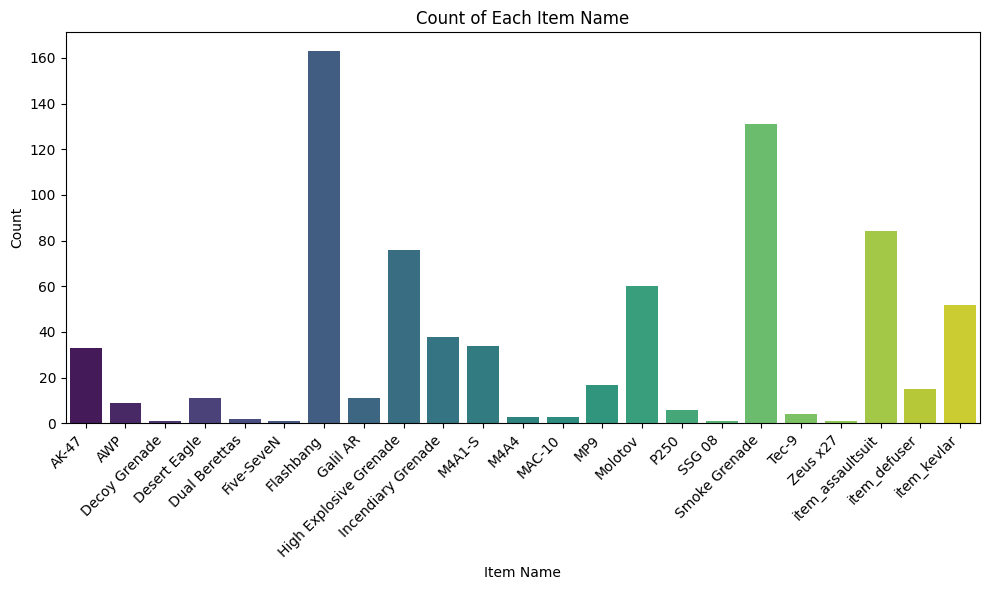

In [28]:
# Plotting with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='item_name', y='count', data=item_name_counts_df, hue='item_name', palette='viridis')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Grouped item purchases for each player

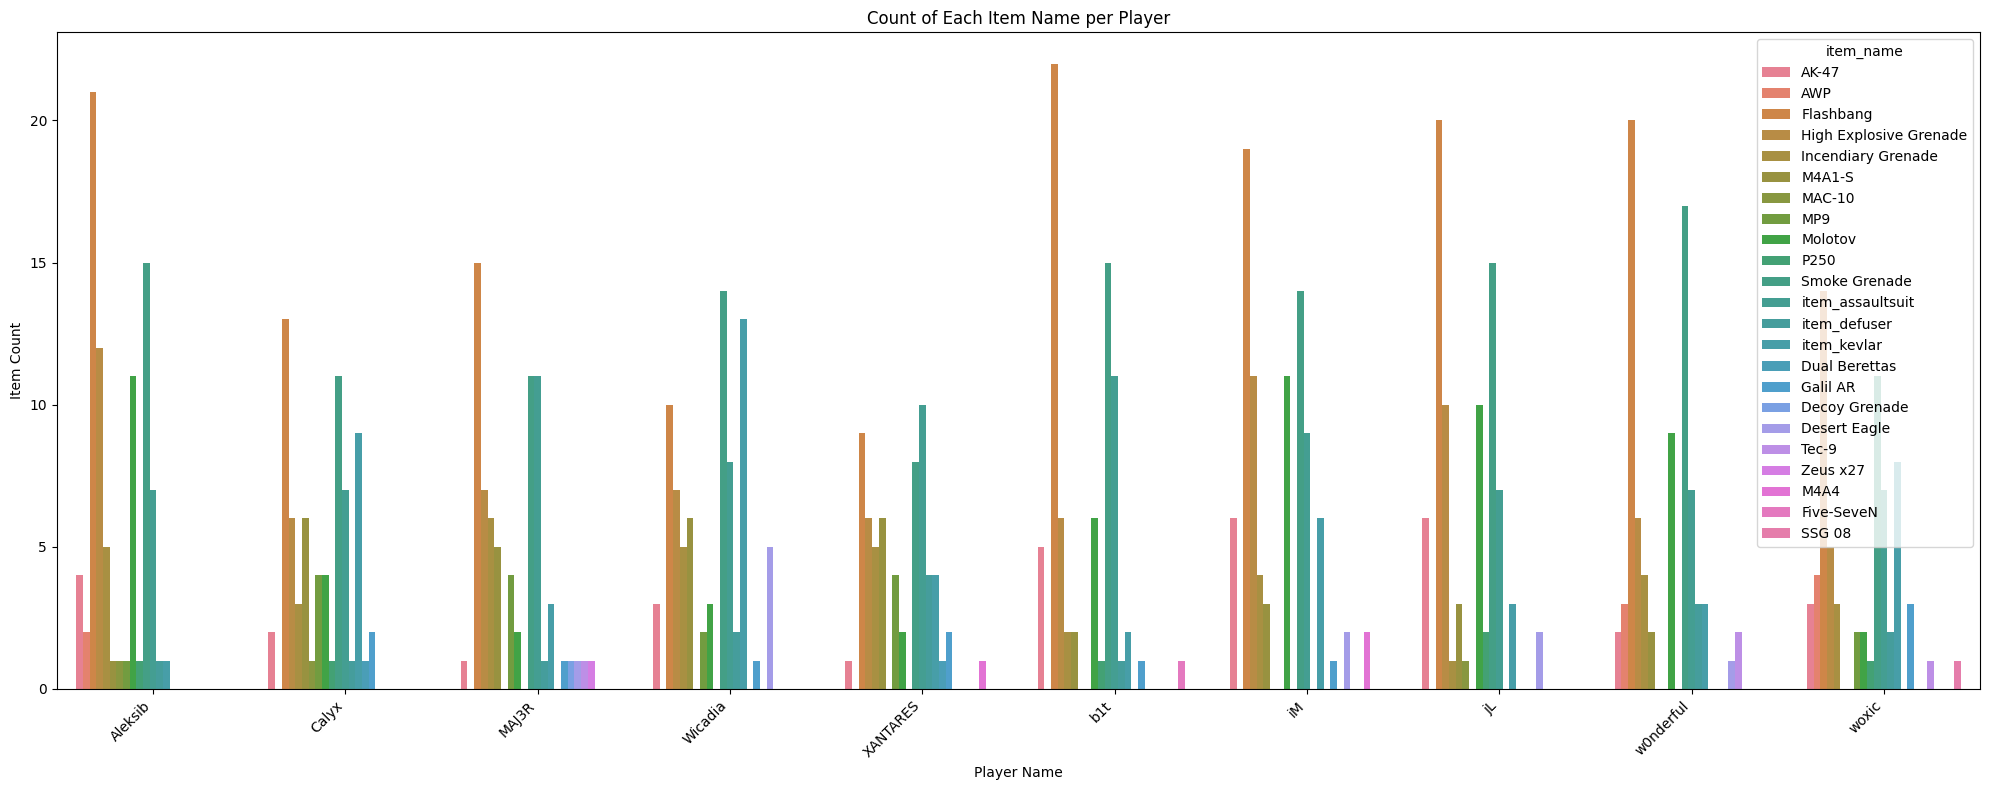

In [29]:
# Group by 'name' and 'item_name' to get the count of each item per player
item_name_per_player = df_item_purchases.groupby(['name', 'item_name']).size().reset_index(name='count')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='name', y='count', hue='item_name', data=item_name_per_player)

# Adding labels and title
plt.xlabel('Player Name')
plt.ylabel('Item Count')
plt.title('Count of Each Item Name per Player')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Task 1

Choose and analyse **four** situation that you find interesting and can be used as an information used to improve players' knowledge.

Here are some examples:
- Identifying most frequent weapon used - determine the most frequently fired weapon by each player across the demo
- Tracking player deaths over time - track the number of deaths for each player across the rounds
- Finding players with highest damage taken - identify players who took the most damage in the demo
- Bomb events analysis - track bomb planting and defusing events over rounds
- Flashbang and HE grenade effectiveness - measure the effectiveness of flashbangs and HE grenades by their usage and detonations
- Team composition over time - track how player teams changed over the course of the game

---------------------------------------------------------------------------

# Celkové požkození do každého hráče
- prvně vypočítáme poškození, který každý hráč v jednotlivých kolech utržel. Toto celkové poškození uložíme do proměnné df_total_dmg
- poté seřadíme sestupně podle atributu "dmg_health"
- a posledně ze získaného poškození vytvoříme graf

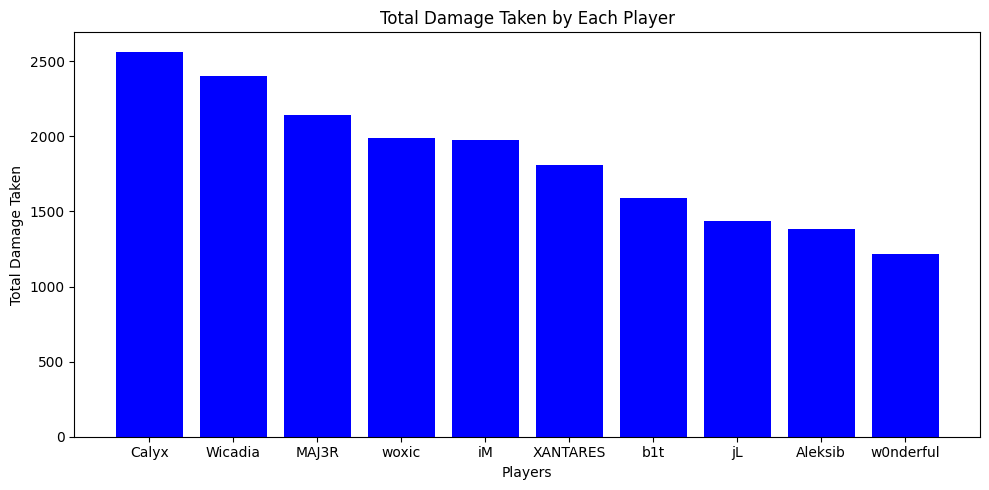

In [7]:
# Získání celkového utrženého poškození pro každého hráče
df_total_dmg = df_player_hurts.groupby('user_name')['dmg_health'].sum().reset_index()

# Seřazení podle dmg_health sestupně
df_total_dmg = df_total_dmg.sort_values(by='dmg_health', ascending=False)

# Vytvoření grafu
plt.figure(figsize=(10, 5))
plt.bar(df_total_dmg['user_name'], df_total_dmg['dmg_health'], color='blue')
plt.title('Total Damage Taken by Each Player')
plt.xlabel('Players')
plt.ylabel('Total Damage Taken')
plt.tight_layout()
plt.show()



---------------------------------------------------------------------------

# Celkový počet smrtí každého hráče
- prvně vypočítáme počet smrtí pro každého hráče a uložíme do proměnné df_total_deaths
- poté seřadíme sestupně podle atributu "deaths"
- a posledně ze získaného počtu smrtí vytvoříme graf

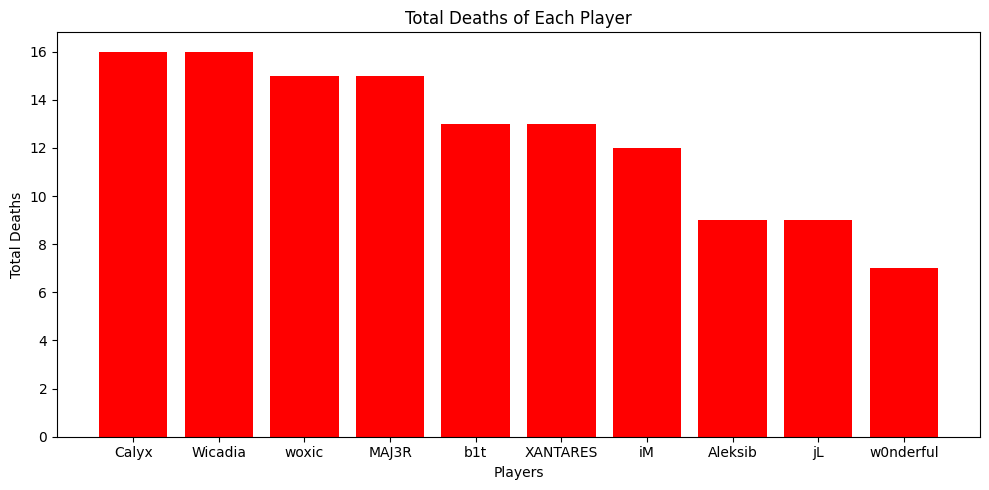

In [8]:
# Získání celkového počtu smrtí
df_total_deaths = df_deaths.groupby('user_name').size().reset_index(name='deaths')

# Seřazení sestupně podle atributu "deaths" (podle počtu smrtí)
df_total_deaths = df_total_deaths.sort_values(by='deaths', ascending=False)

# Vytvoření grafu pro počet smrtí jednotlivých hráčů
plt.figure(figsize=(10, 5))
plt.bar(df_total_deaths['user_name'], df_total_deaths['deaths'], color='red')
plt.title('Total Deaths of Each Player')
plt.xlabel('Players')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------

# Nejkupovanější střelná zbraň pro každého hráče 
- prvně vyfiltrujeme z df_item_purchases ty zbraně, které nejsou střelnými zbraněmi (itemy, které obsahují slovíčko Grenade, Flashbang,item nebo Molotov) a uložíme do proměnné filtered_df
- poté vypočítáme počet koupení jednotlivých zbraní pro jednotlivé hráče a uložíme do proměnné item_name_per_player
- následně najdeme pro každého hráče zbraň s největším počtem koupení a uložíme do proměnné most_used_weapon_per_player
- posledně vytvoříme graf, ve kterém uvidíme nejkupovanější zbraň pro každého hráče

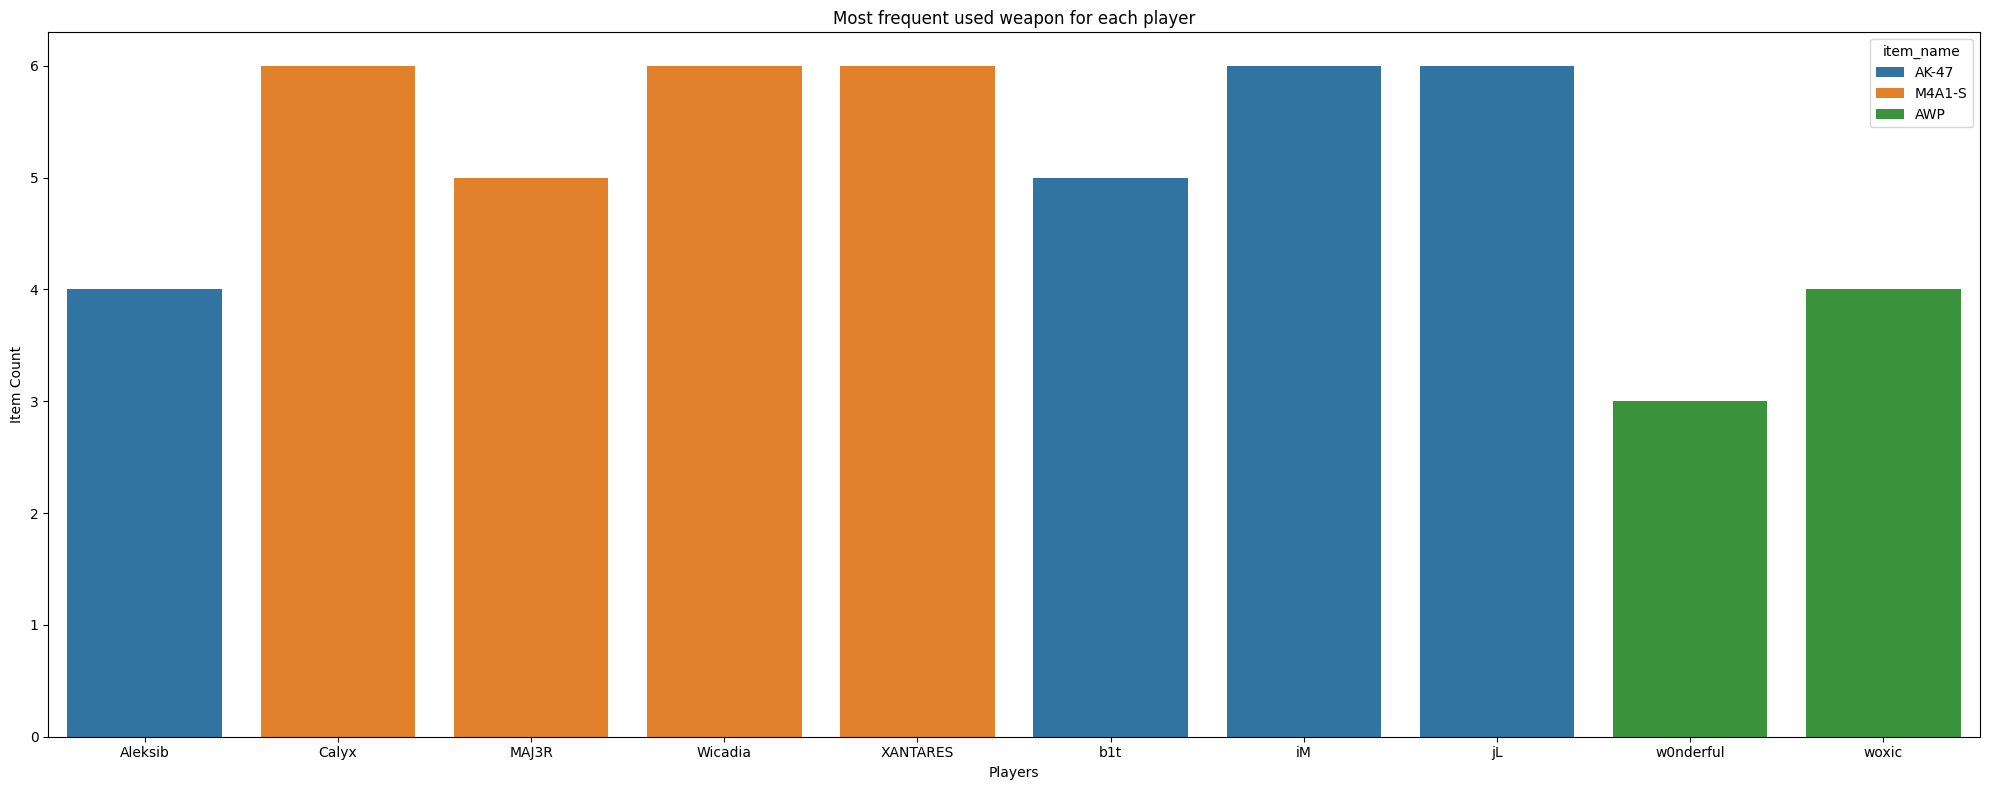

In [9]:
# Filtrování itemů, které neobsahují slova "Grenade", "Flashbang", "Molotov" nebo "item"
filtered_df = df_item_purchases[~df_item_purchases['item_name'].str.contains('Grenade|Flashbang|item|Molotov', case=False, regex=True)]

# Seskupení podle jména hráče a jména zbraně, následně spočítání počtu nákupů zbraní pro jednotlivé hráče
item_name_per_player = filtered_df.groupby(['name', 'item_name']).size().reset_index(name='count')

# Pro každého hráče najdeme zbraň s největším počtem koupení
most_used_weapon_per_player = item_name_per_player.loc[item_name_per_player.groupby('name')['count'].idxmax()]

# Vytvoření grafu pro nejvíce kupovanou střelnou zbraň pro každého hráče
plt.figure(figsize=(20, 8))
sns.barplot(x='name', y='count', hue='item_name', data=most_used_weapon_per_player)

plt.xlabel('Players')
plt.ylabel('Item Count')
plt.title('Most frequent used weapon for each player')

plt.tight_layout()
plt.show()

---------------------------------------------------------------------------

# Nejkupovanější střelné zbraně ve hře seřazené sestupně
- tím, že jsme již vyfiltrovaly zbraně, které nejsou střelné, tak tento krok nemusíme znovu dělat
- prvně vypočítáme počet koupení jednotlivých zbraní a uložíme do proměnné weapon_usage_overall
- poté seřadíme počty nakoupení zbraní sestupně
- posledně vytvoříme graf, ve kterém uvidíme nejvíce kupované střelné zbraně 

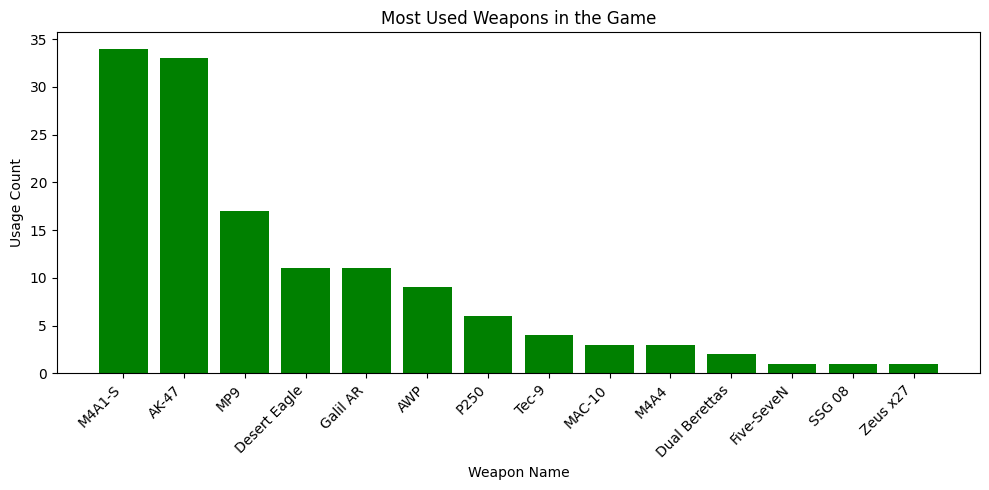

In [10]:
# Seskupení podle jména zbraně a spočítání počtu nakoupení
weapon_usage_overall = filtered_df.groupby('item_name').size().reset_index(name='count')

# Seřazení zbraní podle počtu nakoupení sestupně
weapon_usage_overall_sorted = weapon_usage_overall.sort_values(by='count', ascending=False)

# Vytvoření grafu pro nejvíce kupované zbraně ve hře
plt.figure(figsize=(10, 5))
plt.bar(weapon_usage_overall_sorted['item_name'], weapon_usage_overall_sorted['count'], color='green')
plt.title('Most Used Weapons in the Game')
plt.xlabel('Weapon Name')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------

# Celkové poškození v jednotlivých kolech
- prvně vypočítáme celkové poškození, které bylo uděleno v do hráčů v jednotlivých kolech (df_dmg_per_round)
- přidáme k atributu "total_rounds_played" jedničku, aby kola nezačínala od 0, ale od jedničky
- vytvoříme graf pro celkové poškození do hráčů v jednotlivých kolech

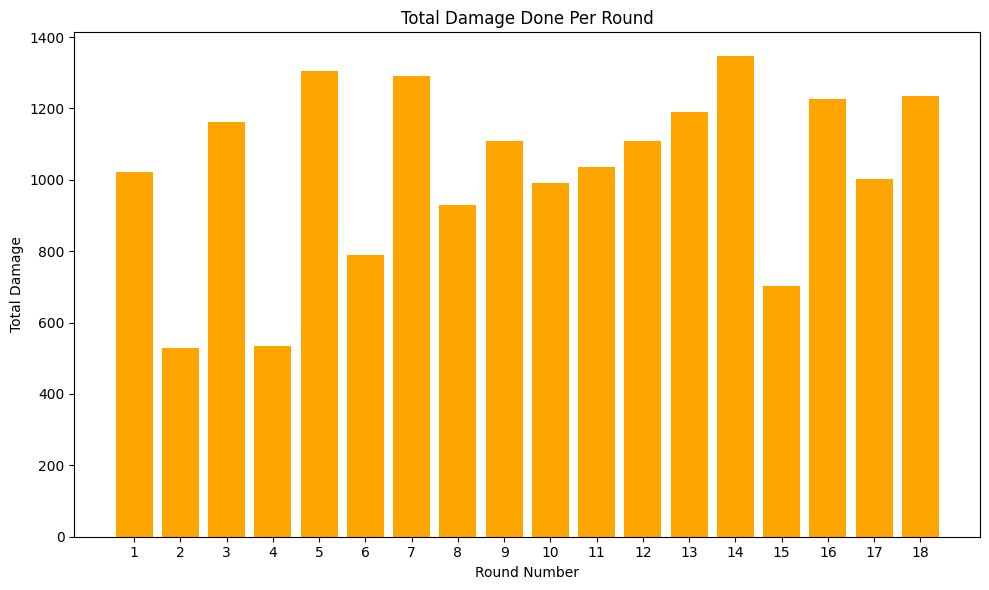

In [11]:
# Vypočítání celkového poškození do hráčů v jednotlivých kolech
df_dmg_per_round = df_player_hurts.groupby('total_rounds_played')['dmg_health'].sum().reset_index(name='total_dmg_per_round')

# Přidání jedničky ke každému kolu (aby kola nezačínala od nuly)
df_dmg_per_round['total_rounds_played'] = df_dmg_per_round['total_rounds_played']+1

# Vytvoření grafu
plt.figure(figsize=(10, 6))
plt.bar(df_dmg_per_round['total_rounds_played'], df_dmg_per_round['total_dmg_per_round'], color='orange')

# Přidání názvů os a titulku grafu
plt.xlabel('Round Number')
plt.ylabel('Total Damage')
plt.title('Total Damage Done Per Round')

# Nastavení hodnot na ose X (pro zajištění, že každé kolo bude na ose X)
plt.xticks(df_dmg_per_round['total_rounds_played'])

# Zobrazení grafu
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------

# Pozice na mapě, kde vybouchly flashbangy, HE granáty a smoky
- prvně jsme museli upravit funkci draw_movement, kterou jsme doplnili o dva parametry -> title a labels
- tyto parametry slouží k pojmenování titulku a popisku obrázku mapy
- poté jsme museli přejmenovat sloupce v df_hegrenade_detonations, df_flashbang_detonations a df_smokegrenade_detonations, aby korespondovali s funkcí draw_movement -> ve funkci draw_movement pracujeme se sloupci 'x' a 'y', ale v df_hegrenade_detonations, df_flashbang_detonations a df_smokegrenade_detonations pracujeme se sloupci 'X' a 'Y'
- následně můžeme využít funkci draw_movement a vykreslit si všechny pozice na mapě, kde vybouchly flashbangy, HE granáty a smoky

<Figure size 1000x600 with 0 Axes>

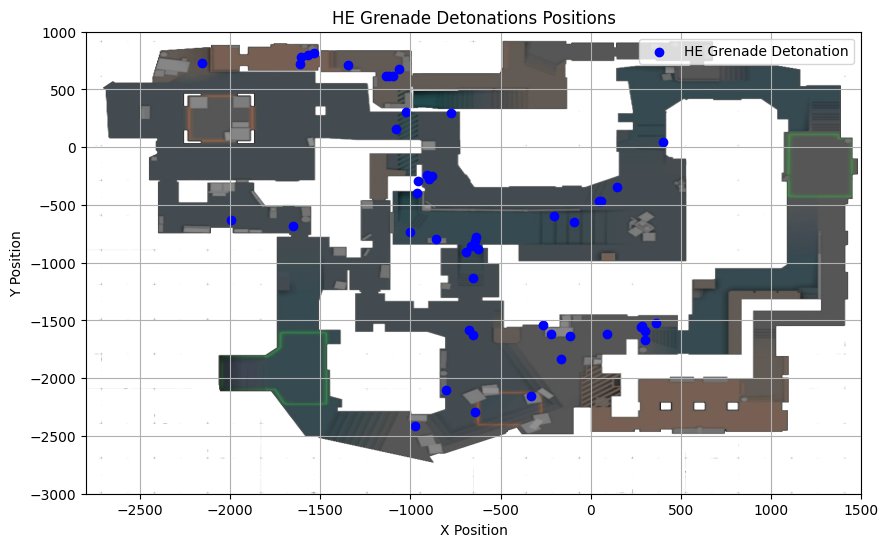

<Figure size 1000x600 with 0 Axes>

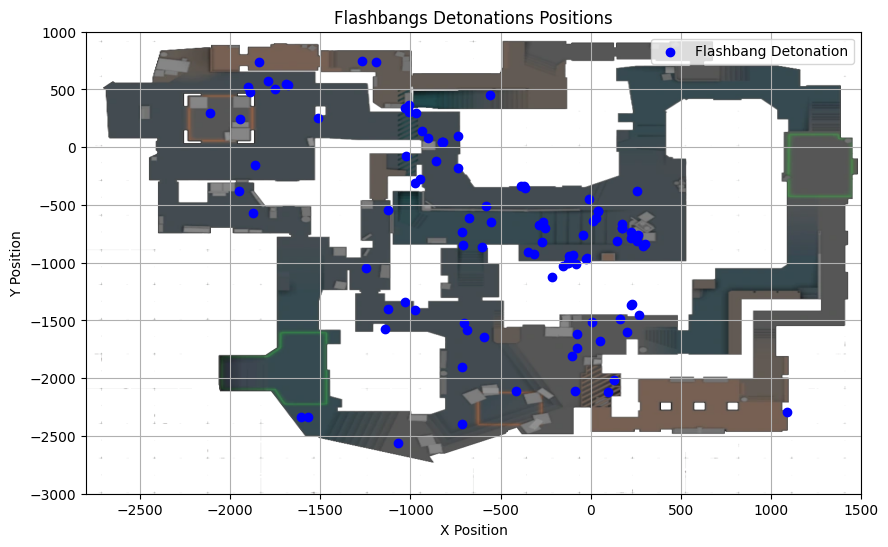

<Figure size 1000x600 with 0 Axes>

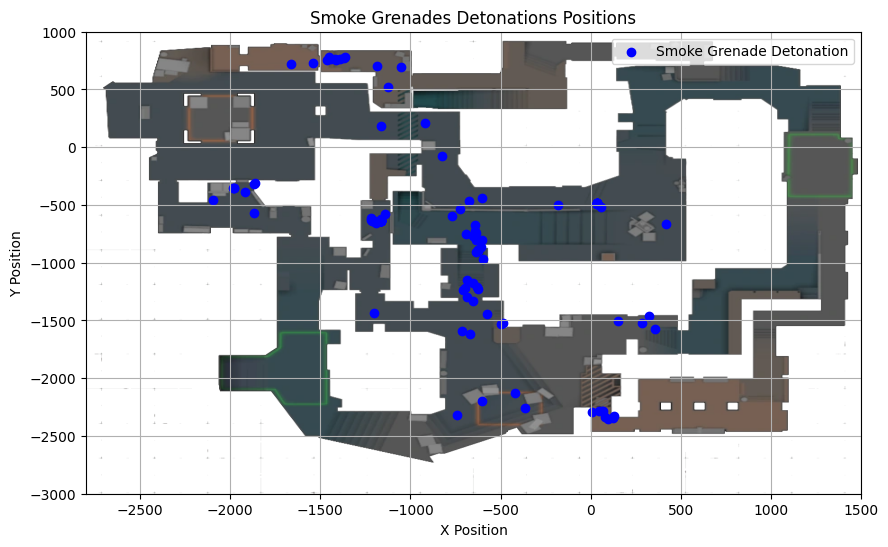

In [17]:
# Přejmenování sloupců 'x' na 'X' a 'y' na 'Y'
df_hegrenade_detonations = df_hegrenade_detonations.rename(columns={'x': 'X', 'y': 'Y'})

# Vykreslení pozic detonací HE granátů na mapu
draw_movement(df_hegrenade_detonations, title='HE Grenade Detonations Positions', labels='HE Grenade Detonation')

# Přejmenování sloupců 'x' na 'X' a 'y' na 'Y'
df_flashbang_detonations = df_flashbang_detonations.rename(columns={'x': 'X', 'y': 'Y'})

# Vykreslení pozic detonací flashbangů na mapu
draw_movement(df_flashbang_detonations, title='Flashbangs Detonations Positions', labels='Flashbang Detonation')

# Přejmenování sloupců 'x' na 'X' a 'y' na 'Y'
df_smokegrenade_detonations = df_smokegrenade_detonations.rename(columns={'x': 'X', 'y': 'Y'})

# Vykreslení pozic detonací smoků na mapu
draw_movement(df_smokegrenade_detonations, title='Smoke Grenades Detonations Positions', labels='Smoke Grenade Detonation')


---------------------------------------------------------------------------

# Celkový počet hozených flashbangů jednotlivými hráči
- prvně vypočítáme počet hozených flashbangů pro jednotlivé hráče (df_fls_throws)
- poté tato data seřadíme sestupně
- posledně vytvoříme graf, ve kterém vidíme počet hozených flashbangů jednotlivými hráči

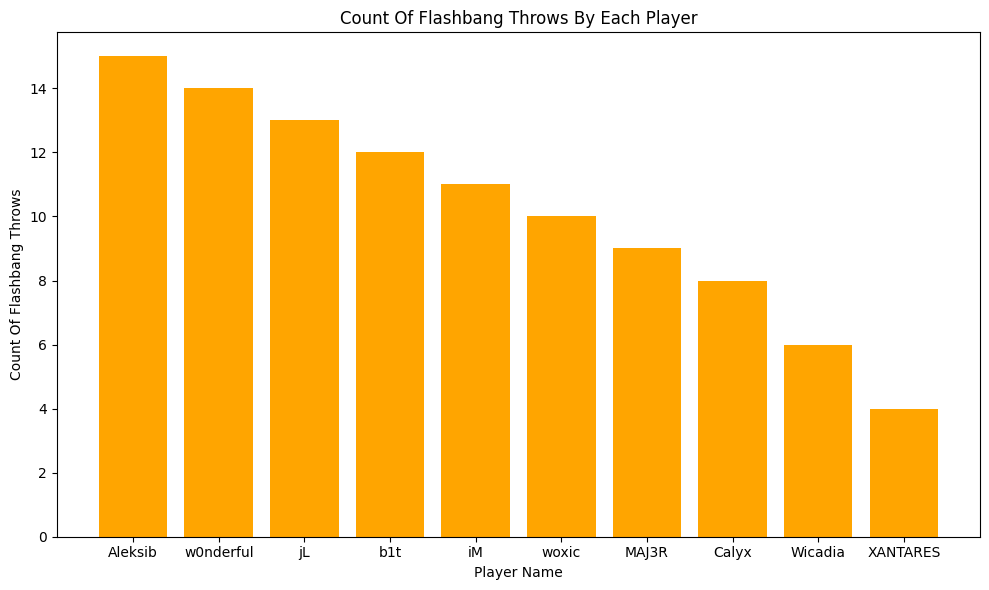

In [13]:
# Vypočítání počtu hozených flashbangů pro jednotlivé hráče
df_fls_throws = df_flashbang_detonations.groupby('user_name').size().reset_index(name='count_of_flashbang_throws')

# Seřazení dat sestupně
df_fls_throws = df_fls_throws.sort_values(by='count_of_flashbang_throws', ascending=False)

# Vytvoření grafu
plt.figure(figsize=(10, 6))
plt.bar(df_fls_throws['user_name'], df_fls_throws['count_of_flashbang_throws'], color='orange')

# Přidání názvů os a titulku grafu
plt.xlabel('Player Name')
plt.ylabel('Count Of Flashbang Throws')
plt.title('Count Of Flashbang Throws By Each Player')

# Nastavení hodnot na ose X (pro zajištění, že každé kolo bude na ose X)
plt.xticks(df_fls_throws['user_name'])

# Zobrazení grafu
plt.tight_layout()
plt.show()


---------------------------------------------------------------------------

# Procentuální šance plantnutí bomby na jednotlivých sitech
- prvně si uděláme kopii dataframu df_bomb_plants, abychom neměnili strukturu originálu
- poté modifikujeme sloupec 'site' tak, že pokud nabývá hodnoty "322", tak se jedná o site "A". Pokud nabývá hodnoty 323, jedná se o site "B" (tuto informaci jsem si našel na internetu)
- následně vypočítáme počet plantnutých bomb na jednotlivých sitech
- vytvoříme graf, ve kterém uvidíme procentuální šanci plantnutí bomby na jednotlivých sitech (A = 54.5%, B = 45.5%)

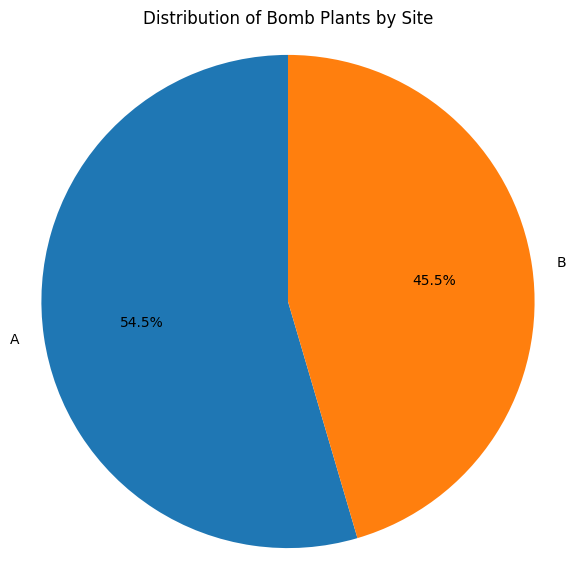

In [14]:
# Vytvoření kopie dataframu df_bomb_plants
df_bomb_plants_modified = df_bomb_plants.copy()

# Modifikace sloupce site
df_bomb_plants_modified['site'] = df_bomb_plants_modified['site'].replace({322: 'A', 323: 'B'})

# Vypočítání počtu plantnutých bomb na jednotlivých sitech
df_bomb_plants_sites = df_bomb_plants_modified.groupby('site').size().reset_index(name='count_of_plants')

# Vytvoření grafu
plt.figure(figsize=(7, 7))
plt.pie(df_bomb_plants_sites['count_of_plants'], labels=df_bomb_plants_sites['site'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bomb Plants by Site')
plt.axis('equal') 
plt.show()